In [19]:
# Jupyter Notebook 설정 : 모든 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [20]:
# DeprecationWarning / FutureWarning(차후 버전에서 없어질 기능이니 미리 경고하는 것) 끄기
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
# matplotlib에서 한글 사용 설정
from matplotlib import font_manager, rc
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin": # Mac OS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

In [22]:
# plt.show() 동작 방법 변경 설정 (window >> jupyter notebook)
%matplotlib inline

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [24]:
prop_df = pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울시 부동산 실거래가 정보(2022~2025) (1).csv", encoding='cp949')
prop_df["단위면적당가격"] = prop_df["물건금액(만원)"] / prop_df["건물면적(㎡)"]
prop_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_23628\1537335319.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울시 부동산 실거래가 정보(2022~2025) (1).csv", encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,단위면적당가격
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구,392.989910
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN,534.827214
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구,393.730887
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구,679.144385
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구",1402.571381


In [25]:
df_food=pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울_202510_음식.csv",encoding='utf-8')
df_food

,열1,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220806509545,하루달곰,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,1.140000e+24,비콘드림힐,서울특별시 노원구 상계로1길 82-14,139816,1693,301,NaN,NaN,127.062003,37.659314
1,MA010120220804193917,양산박,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.170000e+24,명칭없음,서울특별시 서초구 언남11길 34-1,137895,6776,NaN,1,NaN,127.043051,37.475637
2,MA010120220806543796,마녀김밥대치점,청담동,I2,음식,I210,기타 간이,I21007,김밥/만두/분식,I56194,...,1.170000e+24,롯데캐슬,서울특별시 강남구 삼성로85길 11,135841,6195,NaN,1,NaN,127.056186,37.504599
3,MA010120220813096508,육갑식당,NaN,I2,음식,I201,한식,I20107,돼지고기 구이/찜,I56113,...,1.170000e+24,NaN,서울특별시 서초구 방배중앙로 166,137829,6557,NaN,1,NaN,126.986543,37.493835
4,MA010120220809815529,옛날짜장,NaN,I2,음식,I202,중식,I20201,중국집,I56121,...,1.120000e+24,NaN,서울특별시 광진구 긴고랑로9길 41,143901,4908,NaN,NaN,NaN,127.081575,37.565248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135269,MA0101202306A0008096,명성웃음꼬치활짝,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.160000e+24,NaN,서울특별시 동작구 신대방2길 2-7,156853,7067,NaN,지,NaN,126.912947,37.487749
135270,MA0101202306A0044326,신인류,NaN,I2,음식,I211,주점,I21104,요리 주점,I56219,...,1.110000e+24,NaN,서울특별시 종로구 종로 72-1,110122,3189,NaN,4,NaN,126.985466,37.569952
135271,MA0101202306A0026957,휴,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1.170000e+24,역삼푸르지오시티,서울특별시 강남구 논현로85길 52,135923,6235,NaN,2,NaN,127.033813,37.498192
135272,MA0101202306A0041780,참기름짜는육회집,NaN,I2,음식,I201,한식,I20108,소고기 구이/찜,I56113,...,1.170000e+24,NaN,서울특별시 송파구 백제고분로48길 19,138832,5632,NaN,1,NaN,127.115414,37.511187


In [26]:
df_food = pd.read_csv("C:\Sesac_Workspace\sesac_data_analysis_workspace\data\서울_202510_음식.csv", encoding="utf-8")
df_food.head(1)
df_food_=df_food[['시군구명','표준산업분류명']]
s = df_food.value_counts()


,열1,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220806509545,하루달곰,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,1.140000e+24,비콘드림힐,서울특별시 노원구 상계로1길 82-14,139816,1693,301,NaN,NaN,127.062003,37.659314


<class 'pandas.core.frame.DataFrame'> 
         평균가격    음식점수
평균가격  1.0000  0.6062
음식점수  0.6062  1.0000


Text(0.5, 1.0, '소상공인 음식점수와 부동산 가격의 관계')

Text(15.906250000000009, 0.5, '평균가격 (만원/㎡)')

Text(0.5, 28.0625, '음식점수')

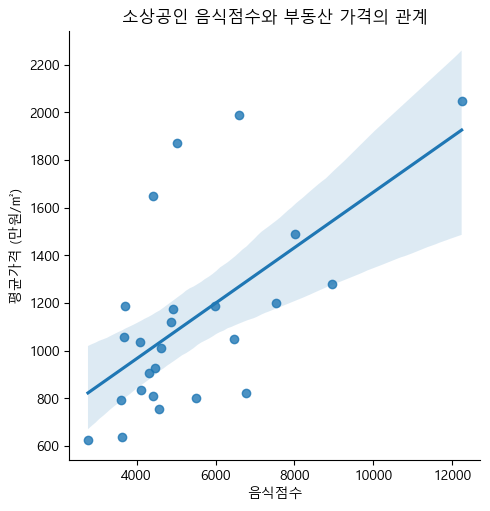

,평균가격,음식점수
강남구,2049.491400,12236
서초구,1989.272070,6591
용산구,1870.107188,5014
성동구,1650.968213,4422
송파구,1491.540527,8005


In [9]:
s1 = prop_df.groupby("자치구명")["단위면적당가격"].mean().sort_values(ascending=False)
s2 = df_food["시군구명"].value_counts().sort_values(ascending=False)
s1.name = "평균가격"
s2.name = "음식점수"
df = pd.concat([s1, s2], axis=1)
# cc = df.corr(method='spearman') # 상관계수 (0.727414)  
# cc = df.corr(method='kendall') # 상관계수 (0.574377)
# cc = df.corr(method='pearson') # 상관계수 (0.694423)
cc = df.corr() # 상관계수 (0.694423)
print(type(cc), "\n", cc)
sns.lmplot(x='음식점수', y='평균가격', data=df)
# plt.text(20, 2500, "상관계수 = 0.694423", size=12)
plt.title("소상공인 음식점수와 부동산 가격의 관계")
plt.ylabel("평균가격 (만원/㎡)")
plt.xlabel("음식점수")
plt.show()
df.head()
#s1
#s2

([<matplotlib.patches.Wedge at 0x24130209e50>,
 [Text(-0.9469491793565193, 0.45363779793577025, '한식 일반 음식점업'),
  Text(-0.28732678056928906, -1.0099224332431118, '커피 전문점'),
  Text(0.6518689498223165, -0.8231445026588894, '서양식 음식점업'),
  Text(1.008122683664586, -0.29357904332719853, '일식 음식점업'),
  Text(1.0169887095343795, 0.2612163177896776, '기타 주점업'),
  Text(0.7958975328398373, 0.6848701462463233, '한식 육류 요리 전문점'),
  Text(0.4778797191569078, 0.9349497173744239, '김밥 및 기타 간이 음식점업'),
  Text(0.1548822313847947, 1.0385140800207124, '제과점업')],
 [Text(-0.6312994529043462, 0.3024251986238468, '35.8%'),
  Text(-0.1915511870461927, -0.6732816221620745, '19.6%'),
  Text(0.43457929988154426, -0.5487630017725929, '10.5%'),
  Text(0.6720817891097239, -0.19571936221813233, '9.1%'),
  Text(0.6779924730229195, 0.17414421185978501, '7.9%'),
  Text(0.5305983552265581, 0.45658009749754874, '6.7%'),
  Text(0.3185864794379385, 0.6232998115829492, '5.6%'),
  Text(0.10325482092319646, 0.6923427200138083, '')])

Text(0.5, 1.0, '강남구')

(np.float64(-1.09999887600365),
 np.float64(1.0999999368700493),
 np.float64(-1.0999930999629584),
 np.float64(1.0999996714268074))

([<matplotlib.patches.Wedge at 0x2413020bc50>,
 [Text(-0.970104324996922, 0.40174319984570545, '한식 일반 음식점업'),
  Text(-0.1079411041178373, -1.0444370340244655, '커피 전문점'),
  Text(0.7651965469651544, -0.719009210311387, '서양식 음식점업'),
  Text(1.0084429372200145, -0.29247708007819984, '김밥 및 기타 간이 음식점업'),
  Text(1.0339611426976691, 0.18282329006811537, '일식 음식점업'),
  Text(0.8601199529950206, 0.6022405387051287, '기타 주점업'),
  Text(0.5508859066155731, 0.8938818254625933, '한식 육류 요리 전문점'),
  Text(0.18694254414073452, 1.0332243150401512, '제과점업')],
 [Text(-0.6467362166646146, 0.2678287998971369, '37.5%'),
  Text(-0.0719607360785582, -0.6962913560163102, '21.7%'),
  Text(0.5101310313101028, -0.4793394735409246, '7.6%'),
  Text(0.6722952914800097, -0.19498472005213321, '7.5%'),
  Text(0.6893074284651127, 0.12188219337874356, '7.1%'),
  Text(0.5734133019966804, 0.4014936924700858, '6.8%'),
  Text(0.3672572710770487, 0.5959212169750621, '6.2%'),
  Text(0.12462836276048968, 0.6888162100267674, '5.7%')])

Text(0.5, 1.0, '서초구')

(np.float64(-1.0999962039723779),
 np.float64(1.09999981975696),
 np.float64(-1.099998250875313),
 np.float64(1.0999999167083483))

([<matplotlib.patches.Wedge at 0x24130231a90>,
 [Text(-0.8113498020914953, 0.6664919344193831, '한식 일반 음식점업'),
  Text(-0.7385106294701588, -0.7463926916574076, '커피 전문점'),
  Text(0.3498807451249735, -0.9899916485459831, '서양식 음식점업'),
  Text(0.9941825699795743, -0.33778842127700126, '기타 주점업'),
  Text(1.016621260340422, 0.26264274789883635, '일식 음식점업'),
  Text(0.8359238729298413, 0.6353985195654572, '한식 육류 요리 전문점'),
  Text(0.5322537895653295, 0.9050999411630442, '김밥 및 기타 간이 음식점업'),
  Text(0.17668133679248516, 1.0350283596255807, '제과점업')],
 [Text(-0.5408998680609968, 0.44432795627958876, '28.1%'),
  Text(-0.49234041964677244, -0.49759512777160503, '18.9%'),
  Text(0.23325383008331566, -0.6599944323639887, '16.7%'),
  Text(0.6627883799863828, -0.22519228085133414, '12.1%'),
  Text(0.6777475068936147, 0.1750951652658909, '6.4%'),
  Text(0.5572825819532274, 0.4235990130436381, '6.2%'),
  Text(0.35483585971021964, 0.6033999607753627, '6.2%'),
  Text(0.11778755786165676, 0.6900189064170538, '5.4%'

Text(0.5, 1.0, '용산구')

(np.float64(-1.099999081660315),
 np.float64(1.0999999535785365),
 np.float64(-1.0999979766785957),
 np.float64(1.0999999036513617))

([<matplotlib.patches.Wedge at 0x24130233890>,
 [Text(-0.9455254374912326, 0.456597905226265, '한식 일반 음식점업'),
  Text(-0.4171680911829731, -0.963571888184143, '커피 전문점'),
  Text(0.4578575262741963, -0.9449161262429983, '기타 주점업'),
  Text(0.9434886182880031, -0.4607919564846969, '중식 음식점업'),
  Text(1.0434832303896515, 0.11680217419028519, '한식 육류 요리 전문점'),
  Text(0.8377522234287191, 0.6329859494019101, '김밥 및 기타 간이 음식점업'),
  Text(0.47290434419476474, 0.9374761230248584, '치킨 전문점'),
  Text(0.1450228680304098, 1.0399367133379964, '제과점업')],
 [Text(-0.6303502916608217, 0.30439860348417663, '35.7%'),
  Text(-0.2781120607886487, -0.6423812587894286, '15.6%'),
  Text(0.30523835084946416, -0.6299440841619988, '11.7%'),
  Text(0.628992412192002, -0.3071946376564646, '9.4%'),
  Text(0.6956554869264342, 0.07786811612685678, '8.6%'),
  Text(0.5585014822858126, 0.4219906329346067, '8.5%'),
  Text(0.3152695627965098, 0.6249840820165722, '6.1%'),
  Text(0.09668191202027321, 0.693291142225331, '')])

Text(0.5, 1.0, '구로구')

(np.float64(-1.0999989859848658),
 np.float64(1.0999999186756757),
 np.float64(-1.0999996627090263),
 np.float64(1.099999983938525))

([<matplotlib.patches.Wedge at 0x241302616d0>,
 [Text(-1.0129986134938045, 0.2762857380677295, '한식 일반 음식점업'),
  Text(-0.06081845602493944, -1.0482371465497407, '커피 전문점'),
  Text(0.7901096248186429, -0.6915394282099491, '기타 주점업'),
  Text(1.0499734784730788, -0.007462874991794256, '한식 육류 요리 전문점'),
  Text(0.9140730531283434, 0.5166918361505519, '김밥 및 기타 간이 음식점업'),
  Text(0.6277156448198247, 0.8417084229401721, '치킨 전문점'),
  Text(0.35996043294665664, 0.9863713736280345, '제과점업'),
  Text(0.12029243891311073, 1.0430866354911923, '중식 음식점업')],
 [Text(-0.6753324089958695, 0.18419049204515298, '41.5%'),
  Text(-0.04054563734995962, -0.6988247643664937, '15.1%'),
  Text(0.5267397498790952, -0.4610262854732994, '13.9%'),
  Text(0.6999823189820525, -0.004975249994529503, '8.8%'),
  Text(0.6093820354188956, 0.34446122410036795, '7.8%'),
  Text(0.41847709654654974, 0.5611389486267814, '5.4%'),
  Text(0.23997362196443772, 0.6575809157520229, ''),
  Text(0.08019495927540715, 0.6953910903274615, '')])

Text(0.5, 1.0, '강북구')

(np.float64(-1.0999909845942293),
 np.float64(1.0999995567494771),
 np.float64(-1.0999999291907459),
 np.float64(1.0999999966281306))

([<matplotlib.patches.Wedge at 0x241302634d0>,
 [Text(-0.9641044399182789, 0.4159358471325379, '한식 일반 음식점업'),
  Text(-0.3007626238681578, -1.0060029046100916, '커피 전문점'),
  Text(0.5530605195521805, -0.8925379889465055, '기타 주점업'),
  Text(0.9764007279439093, -0.38618857889715497, '한식 육류 요리 전문점'),
  Text(1.0235766712548109, 0.2340743430257163, '김밥 및 기타 간이 음식점업'),
  Text(0.7814632957453338, 0.7012953139746773, '치킨 전문점'),
  Text(0.4480663319609731, 0.9495981056020696, '제과점업'),
  Text(0.13907889356773867, 1.0407483179731658, '피자; 햄버거; 샌드위치 및 유사 음식점업')],
 [Text(-0.6427362932788525, 0.2772905647550252, '37.0%'),
  Text(-0.2005084159121052, -0.6706686030733943, '16.7%'),
  Text(0.3687070130347869, -0.5950253259643369, '10.2%'),
  Text(0.6509338186292728, -0.2574590525981033, '10.1%'),
  Text(0.6823844475032073, 0.15604956201714418, '9.0%'),
  Text(0.5209755304968892, 0.46753020931645145, '7.1%'),
  Text(0.29871088797398204, 0.633065403734713, '5.6%'),
  Text(0.09271926237849243, 0.69383221198211

Text(0.5, 1.0, '도봉구')

(np.float64(-1.099997035928484),
 np.float64(1.0999998421861896),
 np.float64(-1.0999973996137373),
 np.float64(1.0999998761720828))

Text(0.5, 1.02, '서울 주요 6개 구 음식점 업종 구성')

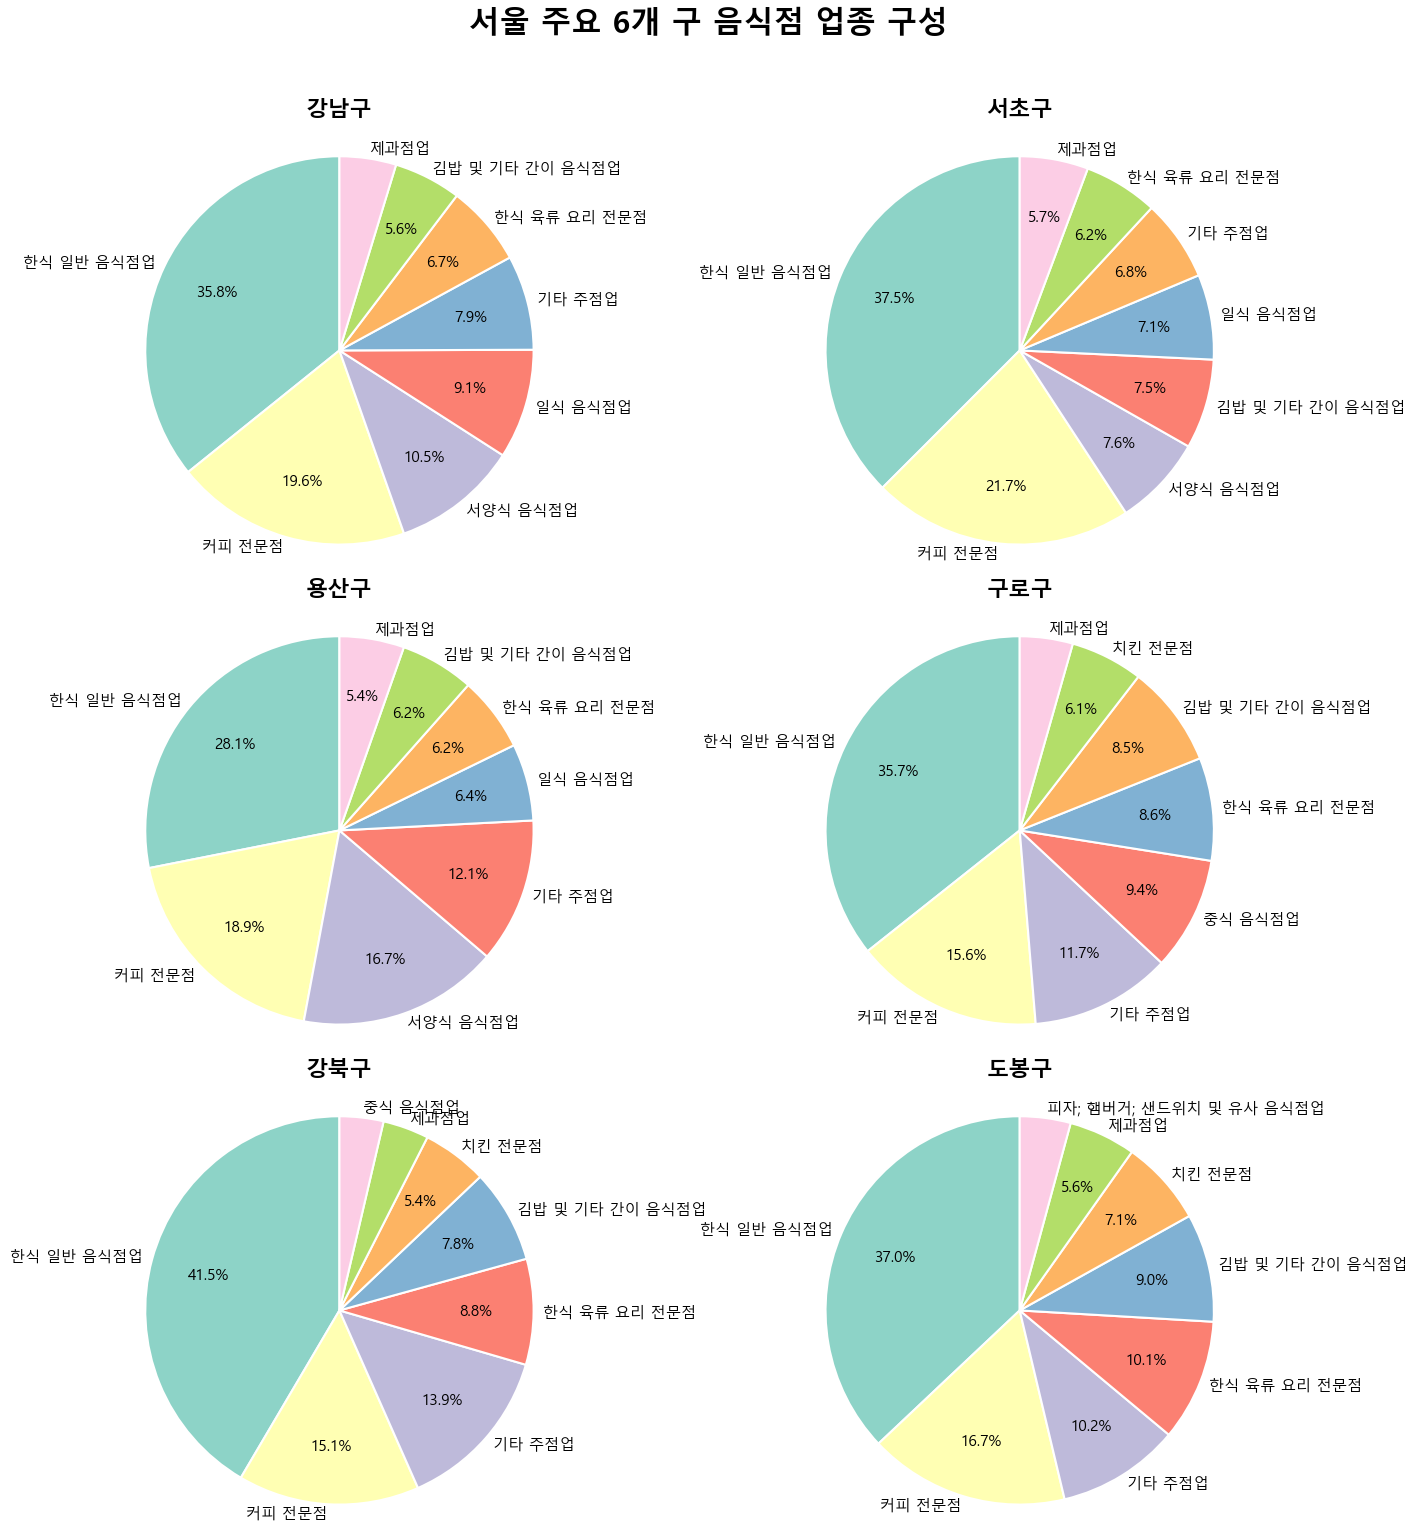

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# 한글 폰트 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 데이터 로드
# df_food = pd.read_csv(...) # 기존 경로 사용

target_gu = ['강남구', '서초구', '용산구', '구로구', '강북구', '도봉구']

# 2) 필터링
df_food_ = df_food[['시군구명', '표준산업분류명']].dropna()
df_food_ = df_food_[df_food_['시군구명'].isin(target_gu)]

# 3) 집계
ct = (
    df_food_
    .groupby('시군구명')['표준산업분류명']
    .value_counts()
    .unstack(fill_value=0)
)

# ⭐ 핵심: target_gu 리스트 순서대로 행 순서를 강제 고정합니다.
ct = ct.reindex(target_gu)

TOP_N = 8
ct_top = ct.apply(
    lambda row: row.sort_values(ascending=False).head(TOP_N),
    axis=1
).fillna(0)

# 4) subplot 설정
n = ct_top.shape[0]
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(14, 15)  # 행이 늘어날 경우 대비해 높이 조절
)
axes = axes.flatten()

def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''

colors = plt.cm.Set3.colors

# 이제 ct_top의 순서는 강남->서초->용산... 순서입니다.
for i, (gu, row) in enumerate(ct_top.iterrows()):
    # 0보다 큰 값만 추출 (기본 내림차순 정렬 유지)
    s = row[row > 0].sort_values(ascending=False)

    axes[i].pie(
        s.values,
        labels=s.index,
        autopct=autopct_func,
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        textprops={'fontsize': 11},
        pctdistance=0.7,
        labeldistance=1.05
    )

    axes[i].set_title(
        gu,
        fontsize=16,
        fontweight='bold',
        pad=15
    )
    axes[i].axis('equal')

# 남는 축 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(
    '서울 주요 6개 구 음식점 업종 구성',
    fontsize=22,
    fontweight='bold',
    y=1.02
)

plt.tight_layout()
plt.show()


([<matplotlib.patches.Wedge at 0x24130313c50>,
 [Text(-0.9920419974211155, 0.4752395978374736, '한식 일반 음식점업'),
  Text(-0.30100900821544574, -1.05801397768326, '커피 전문점'),
  Text(0.6829103283852839, -0.8623418599283603, '서양식 음식점업'),
  Text(1.056128525743852, -0.3075589977713508, '일식 음식점업'),
  Text(1.0654167433217308, 0.27365519006537653, '기타 주점업'),
  Text(0.83379741535602, 0.717483010353291, '한식 육류 요리 전문점'),
  Text(0.5006358962596177, 0.9794711324874917, '김밥 및 기타 간이 음식점업'),
  Text(0.16225757573645158, 1.0879671314502704, '제과점업')],
 [Text(-0.6763922709689424, 0.32402699852555017, '35.8%'),
  Text(-0.20523341469234935, -0.7213731666022227, '19.6%'),
  Text(0.4656206784445117, -0.5879603590420639, '10.5%'),
  Text(0.72008763118899, -0.20969931666228464, '9.1%'),
  Text(0.7264205068102709, 0.18658308413548397, '7.9%'),
  Text(0.5684982377427409, 0.48919296160451653, '6.7%'),
  Text(0.3413426565406484, 0.6678212266960171, '5.6%'),
  Text(0.11063016527485335, 0.7417957714433661, '')])

Text(0.5, 1.0, '[강남구]')

(np.float64(-1.09999887600365),
 np.float64(1.0999999368700493),
 np.float64(-1.0999930999629584),
 np.float64(1.0999996714268074))

([<matplotlib.patches.Wedge at 0x24130331a90>,
 [Text(-1.0162997690443945, 0.4208738284097867, '한식 일반 음식점업'),
  Text(-0.11308115669487717, -1.0941721308827734, '커피 전문점'),
  Text(0.8016344777730189, -0.7532477441357387, '서양식 음식점업'),
  Text(1.0564640294685868, -0.3064045600819237, '김밥 및 기타 간이 음식점업'),
  Text(1.0831973875880345, 0.1915291610237399, '일식 음식점업'),
  Text(0.9010780459947836, 0.6309186595958491, '기타 주점업'),
  Text(0.5771185688353623, 0.9364476266750977, '한식 육류 요리 전문점'),
  Text(0.19584457005219807, 1.082425472899206, '제과점업')],
 [Text(-0.6929316607120871, 0.2869594284612182, '37.5%'),
  Text(-0.07710078865559807, -0.7460264528746181, '21.7%'),
  Text(0.5465689621179675, -0.5135780073652764, '7.6%'),
  Text(0.7203163837285819, -0.20891220005585703, '7.5%'),
  Text(0.738543673355478, 0.13058806433436812, '7.1%'),
  Text(0.6143713949964433, 0.43017181336080623, '6.8%'),
  Text(0.3934899332968379, 0.6384870181875666, '6.2%'),
  Text(0.13353038867195322, 0.7380173678858223, '5.7%')])

Text(0.5, 1.0, '[서초구]')

(np.float64(-1.0999962039723779),
 np.float64(1.09999981975696),
 np.float64(-1.099998250875313),
 np.float64(1.0999999167083483))

([<matplotlib.patches.Wedge at 0x24130333890>,
 [Text(-0.8499855069529951, 0.698229645582211, '한식 일반 음식점업'),
  Text(-0.7736778023020711, -0.781935200783951, '커피 전문점'),
  Text(0.3665417329880675, -1.0371341080005538, '서양식 음식점업'),
  Text(1.0415245971214588, -0.3538735841949537, '기타 주점업'),
  Text(1.065031796547109, 0.2751495454178286, '일식 음식점업'),
  Text(0.8757297716407861, 0.6656555919257171, '한식 육류 요리 전문점'),
  Text(0.5575992081160596, 0.9481999383612845, '김밥 및 기타 간이 음식점업'),
  Text(0.18509473378260352, 1.084315424369656, '제과점업')],
 [Text(-0.5795355729224967, 0.4760656674424165, '28.1%'),
  Text(-0.5275075924786847, -0.5331376368981483, '18.9%'),
  Text(0.24991481794640963, -0.7071368918185593, '16.7%'),
  Text(0.7101304071282674, -0.2412774437692866, '12.1%'),
  Text(0.7261580431003015, 0.18760196278488311, '6.4%'),
  Text(0.5970884806641723, 0.453856085403898, '6.2%'),
  Text(0.3801812782609496, 0.6464999579736029, '6.2%'),
  Text(0.12620095485177513, 0.7393059711611291, '5.4%')])

Text(0.5, 1.0, '[용산구]')

(np.float64(-1.099999081660315),
 np.float64(1.0999999535785365),
 np.float64(-1.0999979766785957),
 np.float64(1.0999999036513617))

([<matplotlib.patches.Wedge at 0x241303616d0>,
 [Text(-0.9905504583241485, 0.4783406626179919, '한식 일반 음식점업'),
  Text(-0.43703323838216235, -1.0094562638119593, '커피 전문점'),
  Text(0.4796602656205866, -0.9899121322545696, '기타 주점업'),
  Text(0.988416647730289, -0.48273443060301585, '중식 음식점업'),
  Text(1.0931729080272539, 0.12236418248506067, '한식 육류 요리 전문점'),
  Text(0.8776451864491344, 0.6631281374686678, '김밥 및 기타 간이 음식점업'),
  Text(0.4954235986802298, 0.9821178431688994, '치킨 전문점'),
  Text(0.15192871888900078, 1.0894575092112344, '제과점업')],
 [Text(-0.6753753124937375, 0.3261413608759035, '35.7%'),
  Text(-0.29797720798783794, -0.688265634417245, '15.6%'),
  Text(0.3270410901958545, -0.6749400901735702, '11.7%'),
  Text(0.6739204416342879, -0.3291371117747835, '9.4%'),
  Text(0.7453451645640368, 0.08343012442163228, '8.6%'),
  Text(0.598394445306228, 0.45213282100136437, '8.5%'),
  Text(0.3377888172819748, 0.6696258021606132, '6.1%'),
  Text(0.10358776287886415, 0.7428119380985689, '')])

Text(0.5, 1.0, '[구로구]')

(np.float64(-1.0999989859848658),
 np.float64(1.0999999186756757),
 np.float64(-1.0999996627090263),
 np.float64(1.099999983938525))

([<matplotlib.patches.Wedge at 0x241303634d0>,
 [Text(-1.061236642707795, 0.28944220178524044, '한식 일반 음식점업'),
  Text(-0.06371457297850798, -1.0981532011473474, '커피 전문점'),
  Text(0.8277338926671498, -0.7244698771723277, '기타 주점업'),
  Text(1.0999722155432254, -0.007818249991403506, '한식 육류 요리 전문점'),
  Text(0.9576003413725503, 0.5412962093005782, '김밥 및 기타 간이 음식점업'),
  Text(0.657606866001721, 0.8817897764135137, '치킨 전문점'),
  Text(0.37710140594411645, 1.0333414390388933, '제과점업'),
  Text(0.12602065028992554, 1.0927574276574397, '중식 음식점업')],
 [Text(-0.7235704382098602, 0.19734695576266392, '41.5%'),
  Text(-0.04344175430352817, -0.7487408189641005, '15.1%'),
  Text(0.564364017727602, -0.4939567344356779, '13.9%'),
  Text(0.7499810560521991, -0.005330624994138754, '8.8%'),
  Text(0.6529093236631025, 0.36906559725039423, '7.8%'),
  Text(0.44836831772844615, 0.601220302100123, '5.4%'),
  Text(0.2571145949618976, 0.7045509811628818, ''),
  Text(0.08592317065222195, 0.7450618824937087, '')])

Text(0.5, 1.0, '[강북구]')

(np.float64(-1.0999909845942293),
 np.float64(1.0999995567494771),
 np.float64(-1.0999999291907459),
 np.float64(1.0999999966281306))

([<matplotlib.patches.Wedge at 0x24130395310>,
 [Text(-1.0100141751524827, 0.43574231604361113, '한식 일반 음식점업'),
  Text(-0.31508465357616533, -1.0539078048296198, '커피 전문점'),
  Text(0.579396734768951, -0.9350397979439581, '기타 주점업'),
  Text(1.0228960007031431, -0.40457851122559096, '한식 육류 요리 전문점'),
  Text(1.07231841750504, 0.24522074031265517, '김밥 및 기타 간이 음식점업'),
  Text(0.8186758336379687, 0.7346903289258524, '치킨 전문점'),
  Text(0.4694028239591147, 0.9948170630116919, '제과점업'),
  Text(0.14570169802334526, 1.0903077616861736, '피자; 햄버거; 샌드위치 및 유사 음식점업')],
 [Text(-0.6886460285130562, 0.2970970336660985, '37.0%'),
  Text(-0.21483044562011272, -0.7185735032929226, '16.7%'),
  Text(0.39504322825155747, -0.6375271349617896, '10.2%'),
  Text(0.6974290913885066, -0.27584898492653925, '10.1%'),
  Text(0.7311261937534363, 0.16719595930408307, '9.0%'),
  Text(0.5581880683895241, 0.5009252242676265, '7.1%'),
  Text(0.3200473799721236, 0.6782843611443353, '5.6%'),
  Text(0.09934206683409905, 0.743391655695

Text(0.5, 1.0, '[도봉구]')

(np.float64(-1.099997035928484),
 np.float64(1.0999998421861896),
 np.float64(-1.0999973996137373),
 np.float64(1.0999998761720828))

Text(0.5, 0.98, '서울 주요 6개 구 음식점 업종 구성 비율')

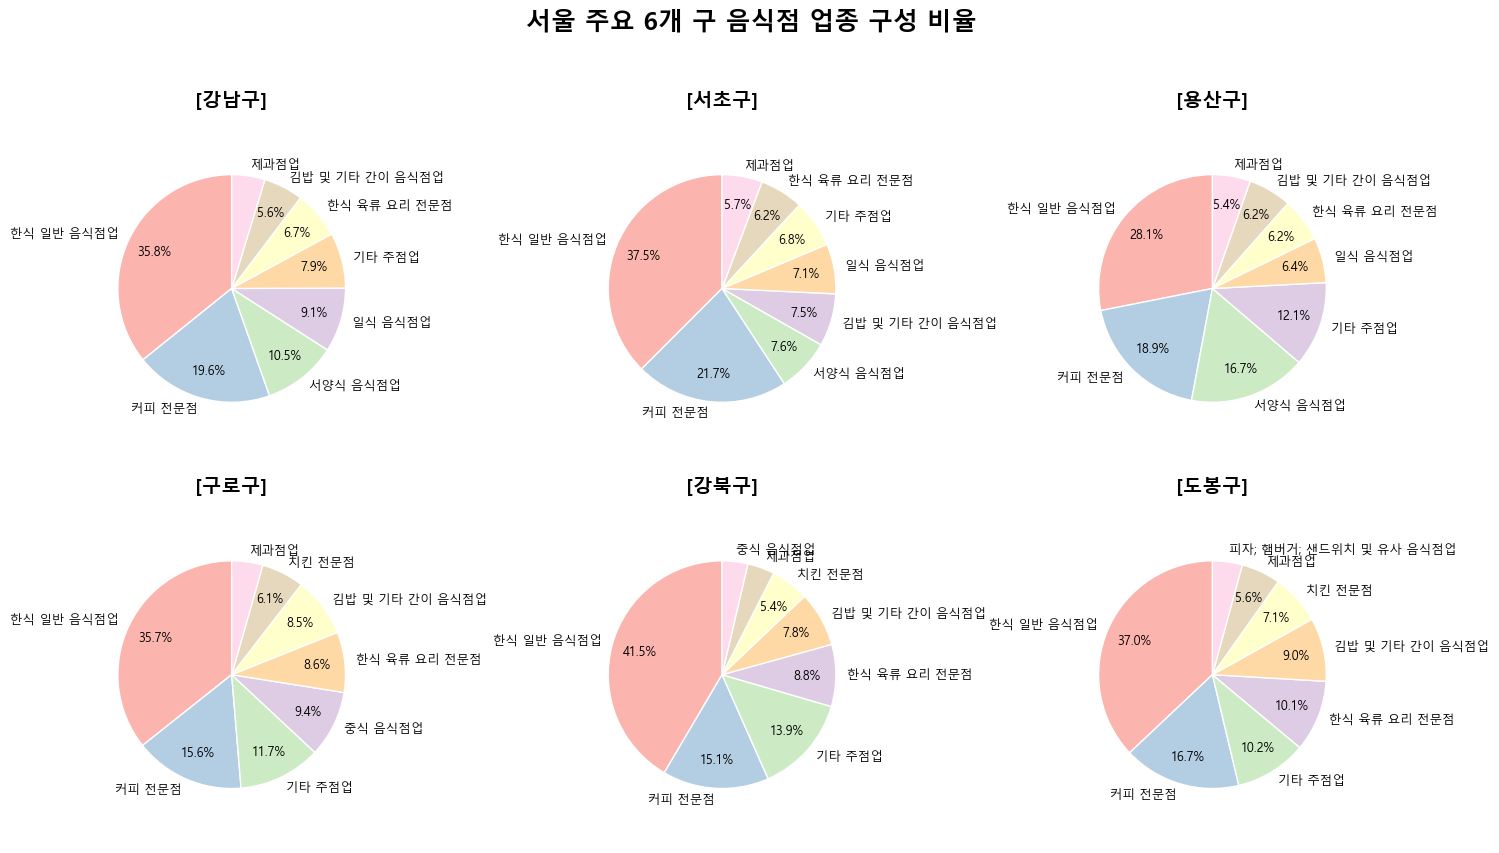

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 데이터 필터링 및 순서 고정 (위와 동일)
target_gu = ['강남구', '서초구', '용산구', '구로구', '강북구', '도봉구']
df_food_ = df_food[['시군구명', '표준산업분류명']].dropna()
df_food_ = df_food_[df_food_['시군구명'].isin(target_gu)]

ct = df_food_.groupby('시군구명')['표준산업분류명'].value_counts().unstack(fill_value=0)
ct = ct.reindex(target_gu)

TOP_N = 8
ct_top = ct.apply(lambda row: row.sort_values(ascending=False).head(TOP_N), axis=1).fillna(0)

# 2) Subplot 설정 변경 (3열로 배치하여 크기 축소)
n = ct_top.shape[0]
ncols = 3  # 3개씩 배치
nrows = math.ceil(n / ncols)

# figsize를 가로로 길게, 세로는 적당히 조절 (15, 9 추천)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 9))
axes = axes.flatten()

def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''

colors = plt.cm.Pastel1.colors  # 색상을 조금 더 연한 파스텔톤으로 변경 가능

for i, (gu, row) in enumerate(ct_top.iterrows()):
    s = row[row > 0].sort_values(ascending=False)

    axes[i].pie(
        s.values,
        labels=s.index,
        autopct=autopct_func,
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 9},  # 글씨 크기를 살짝 줄임
        pctdistance=0.75,
        labeldistance=1.1
    )

    axes[i].set_title(f"[{gu}]", fontsize=14, fontweight='bold', pad=10)
    axes[i].axis('equal')

# 남는 축 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('서울 주요 6개 구 음식점 업종 구성 비율', fontsize=18, fontweight='bold', y=0.98)

# 서브플롯 간의 간격 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [11]:
df_cafe = df_food[df_food['상권업종소분류명'] == '카페']


In [12]:
df_cafe.groupby("시군구명")

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='시군구명'>

Text(0.5, 1.0, '서울 시군구별 카페 분포')

Text(0.5, 0, '시군구명')

Text(0, 0.5, '카페 개수')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '강남구'),
  Text(1, 0, '마포구'),
  Text(2, 0, '송파구'),
  Text(3, 0, '종로구'),
  Text(4, 0, '서초구'),
  Text(5, 0, '영등포구'),
  Text(6, 0, '중구'),
  Text(7, 0, '강서구'),
  Text(8, 0, '용산구'),
  Text(9, 0, '성북구'),
  Text(10, 0, '광진구'),
  Text(11, 0, '관악구'),
  Text(12, 0, '강동구'),
  Text(13, 0, '성동구'),
  Text(14, 0, '동대문구'),
  Text(15, 0, '서대문구'),
  Text(16, 0, '노원구'),
  Text(17, 0, '구로구'),
  Text(18, 0, '은평구'),
  Text(19, 0, '동작구'),
  Text(20, 0, '양천구'),
  Text(21, 0, '금천구'),
  Text(22, 0, '중랑구'),
  Text(23, 0, '강북구'),
  Text(24, 0, '도봉구')])

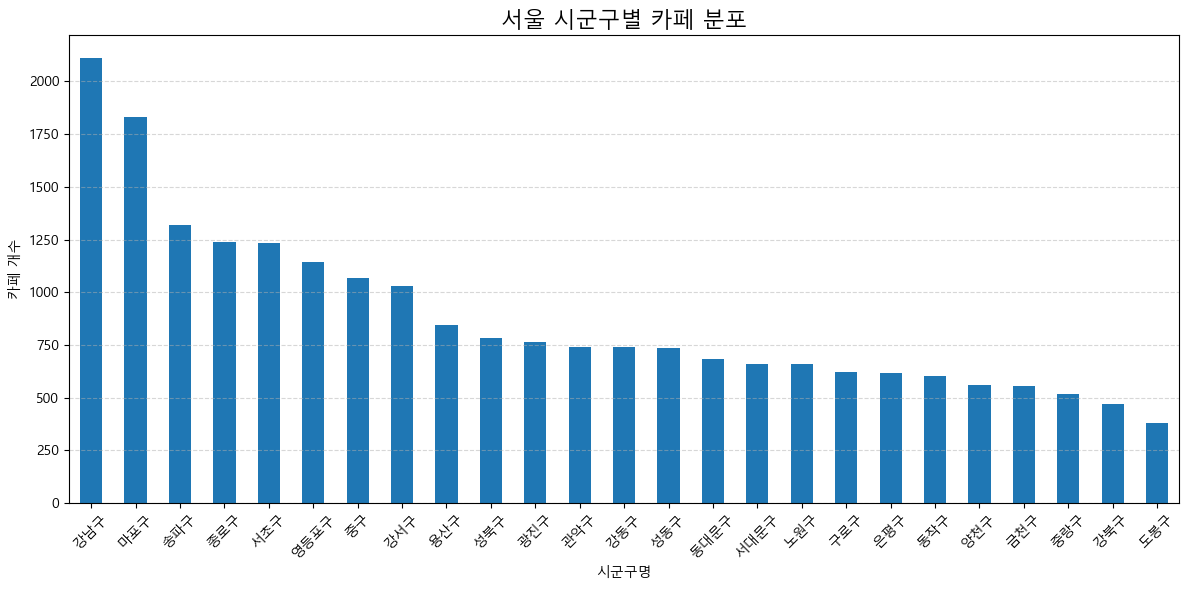

In [13]:
# 2️⃣ 카페만 필터링
df_cafe = df_food[df_food['상권업종소분류명'] == '카페']

# 3️⃣ 시군구명별 카페 개수 집계
cafe_count = (
    df_cafe
    .groupby('시군구명')
    .size()
    .sort_values(ascending=False)
)

# 4️⃣ bar 차트 그리기
plt.figure(figsize=(12, 6))
cafe_count.plot(kind='bar')

plt.title('서울 시군구별 카페 분포', fontsize=16)
plt.xlabel('시군구명')
plt.ylabel('카페 개수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'> 
              평균가격   개인카폐매장수
평균가격     1.000000  0.650123
개인카폐매장수  0.650123  1.000000


Text(0.5, 1.0, '개인카폐 매장수와 부동산 가격의 관계')

Text(15.906250000000009, 0.5, '평균가격 (만원/㎡)')

Text(0.5, 28.203125000000007, '개인카폐매장수')

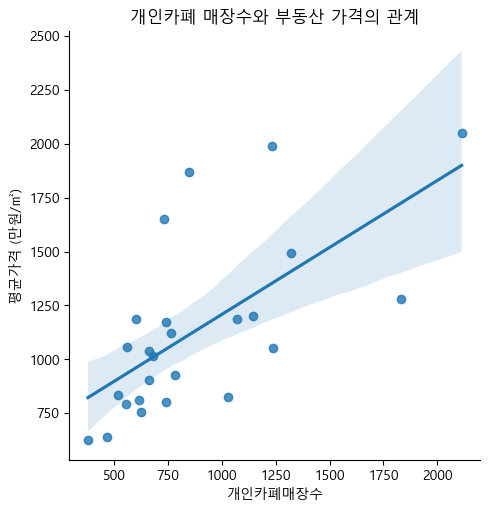

,평균가격,개인카폐매장수
강남구,2049.491400,2113
서초구,1989.272070,1233
용산구,1870.107188,846
성동구,1650.968213,734
송파구,1491.540527,1321


In [14]:
s1 = prop_df.groupby("자치구명")["단위면적당가격"].mean().sort_values(ascending=False)
s2 = df_cafe["시군구명"].value_counts().sort_values(ascending=False)
s1.name = "평균가격"
s2.name = "개인카폐매장수"
df = pd.concat([s1, s2], axis=1)
# cc = df.corr(method='spearman') # 상관계수 (0.727414)  
# cc = df.corr(method='kendall') # 상관계수 (0.574377)
# cc = df.corr(method='pearson') # 상관계수 (0.694423)
cc = df.corr() # 상관계수 (0.694423)
print(type(cc), "\n", cc)
sns.lmplot(x='개인카폐매장수', y='평균가격', data=df)
# plt.text(20, 2500, "상관계수 = 0.694423", size=12)
plt.title("개인카폐 매장수와 부동산 가격의 관계")
plt.ylabel("평균가격 (만원/㎡)")
plt.xlabel("개인카폐매장수")
plt.show()
df.head()
#s1
#s2

In [15]:
print(type(cc), "\n", cc)

<class 'pandas.core.frame.DataFrame'> 
              평균가격   개인카폐매장수
평균가격     1.000000  0.650123
개인카폐매장수  0.650123  1.000000


In [27]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135274 entries, 0 to 135273
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   열1         135274 non-null  object 
 1   상호명        135274 non-null  object 
 2   지점명        21947 non-null   object 
 3   상권업종대분류코드  135274 non-null  object 
 4   상권업종대분류명   135274 non-null  object 
 5   상권업종중분류코드  135274 non-null  object 
 6   상권업종중분류명   135274 non-null  object 
 7   상권업종소분류코드  135274 non-null  object 
 8   상권업종소분류명   135274 non-null  object 
 9   표준산업분류코드   135094 non-null  object 
 10  표준산업분류명    135094 non-null  object 
 11  시도코드       135274 non-null  int64  
 12  시도명        135274 non-null  object 
 13  시군구코드      135274 non-null  int64  
 14  시군구명       135274 non-null  object 
 15  행정동코드      135274 non-null  int64  
 16  행정동명       135274 non-null  object 
 17  법정동코드      135274 non-null  int64  
 18  법정동명       135274 non-null  object 
 19  지번코드       135274 non-n

In [28]:
len(df_food)

135274

In [29]:
len(df_food.columns)

39